<a href="https://colab.research.google.com/github/wenjunsun/personal-machine-learning-projects/blob/master/cancer-fracture/task2/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to apply some clustering algorithms to our dataset of patients. (features are binary, indicating whether patient has some other contingency diseases and disorders). We want to group similar patients together and see what those groups mean, and also find relevant features for our supervised machine learning model (to predict whether patient will have cancer fracture or not)

# 0. Prepare data

In [1]:
cd drive/MyDrive/fracture_with_emisa/Task2/data/

/content/drive/MyDrive/fracture_with_emisa/Task2/data


In [2]:
ls

BillingCodes.csv  LabInterpretation.csv   RadiationTherapy.csv
Binary/           LabInterpretation.xlsx  RadiationTherapyTargets.csv
BonyLesions.csv   Labs.csv                Signs.csv
Cdiff.csv         Medications.csv         Stage.csv
Demographics.csv  merged.csv              SurvivalDays.csv
Diagnoses.csv     MyelomaTherapy.csv      Symptoms.csv
FISH.csv          PlasmaCells.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("merged.csv")

In [5]:
data

,Unnamed: 0,Unspecified essential hypertension code,Encounter for change or removal of surgical wound dressing code,Esophageal reflux code,Personal history of allergy to other specified medicinal agents code,"Anemia, unspecified code","Leukocytosis, unspecified code",Other specified aftercare following surgery code,"Neutropenia, unspecified code",Disorders of magnesium metabolism code,Other specified pre-operative examination code,"Constipation, unspecified code",Other pancytopenia code,"Laboratory examination, unspecified code","Backache, unspecified code",Hypopotassemia code,"Thrombocytopenia, unspecified code","Hypogammaglobulinemia, unspecified code",Other postprocedural status code,Disturbance of skin sensation code,"Fever, unspecified code",Examination of participant in clinical trial code,Dietary surveillance and counseling code,Antineoplastic and immunosuppressive drugs causing adverse effects in therapeutic use code,"Mineral deficiency, not elsewhere classified code","Radiological examination, not elsewhere classified code",Intestinal infection due to Clostridium difficile code,Bacteremia code,Benign essential hypertension code,Cough code,Orthostatic hypotension code,Dysuria code,"Abdominal pain, unspecified site code",Antineoplastic chemotherapy induced pancytopenia code,Fever presenting with conditions classified elsewhere code,Family history of other condition code,Mucositis (ulcerative) due to antineoplastic therapy code,Morbid obesity code,Shortness of breath code,Dyspepsia and other specified disorders of function of stomach code,...,Other nonspecific abnormal serum enzyme levels code,Allergy status to narcotic agent status code,"Unspecified transfusion reaction, initial encounter code",Enterocolitis due to Clostridium difficile code,Other transfusion reaction code,Long-term (current) use of antibiotics code,Other and unspecified coagulation defects code,Special screening examination for Human papillomavirus (HPV) code,"Follicular disorder, unspecified code",Other specified anxiety disorders code,Other symptoms involving digestive system code,Other specified examination code,Other fluid overload code,Infection with microorganisms without mention of resistance to multiple drugs code,Carrier or suspected carrier of other specified bacterial diseases code,Renal dialysis status code,Complications of other specified transplanted organ code,Polyneuropathy in malignant disease code,Gastroparesis code,Other nonspecific abnormal finding of lung field code,Other and unspecified mycoses code,Family history of other chronic respiratory conditions code,Long-term (current) use of aspirin code,"Chronic sinusitis, unspecified code","Hemorrhage of vascular prosthetic devices, implants and grafts, initial encounter code",Activated protein C resistance code,Monoclonal gammopathy code,Fibromyalgia code,ALT,ALK,BETA2,CRE,TP,Lenalidomide,Bortezomib,Etoposide,Cisplatin,Doxorubicin,Bendamustine,Melphalan
0,MM1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,1.0,1.0,1,1,0,0,0,0,0
1,MM10,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
2,MM102,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0
3,MM103,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0
4,MM105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [6]:
# drop ID column
data = data.drop(['Unnamed: 0'], axis = 1)

Let's look at the columns that contain nulls.

In [17]:
for column in series_of_nulls.index:
  num_nulls_in_this_col = series_of_nulls[column]
  if num_nulls_in_this_col != 0:
    print(f"column {column} has {num_nulls_in_this_col} nulls.")

column ALT has 24 nulls.
column ALK has 25 nulls.
column BETA2 has 43 nulls.
column CRE has 24 nulls.
column TP has 25 nulls.


As we can see those 5 columns are the only columns that have nulls in them. We might want to just drop those 5 columns, or we can drop all the rows with any nulls. I will do the latter but we can come back at how we deal with nulls.

In [18]:
# drop any null rows.
# could've drop null columns instead.
data = data.dropna()

In [19]:
data

,Unspecified essential hypertension code,Encounter for change or removal of surgical wound dressing code,Esophageal reflux code,Personal history of allergy to other specified medicinal agents code,"Anemia, unspecified code","Leukocytosis, unspecified code",Other specified aftercare following surgery code,"Neutropenia, unspecified code",Disorders of magnesium metabolism code,Other specified pre-operative examination code,"Constipation, unspecified code",Other pancytopenia code,"Laboratory examination, unspecified code","Backache, unspecified code",Hypopotassemia code,"Thrombocytopenia, unspecified code","Hypogammaglobulinemia, unspecified code",Other postprocedural status code,Disturbance of skin sensation code,"Fever, unspecified code",Examination of participant in clinical trial code,Dietary surveillance and counseling code,Antineoplastic and immunosuppressive drugs causing adverse effects in therapeutic use code,"Mineral deficiency, not elsewhere classified code","Radiological examination, not elsewhere classified code",Intestinal infection due to Clostridium difficile code,Bacteremia code,Benign essential hypertension code,Cough code,Orthostatic hypotension code,Dysuria code,"Abdominal pain, unspecified site code",Antineoplastic chemotherapy induced pancytopenia code,Fever presenting with conditions classified elsewhere code,Family history of other condition code,Mucositis (ulcerative) due to antineoplastic therapy code,Morbid obesity code,Shortness of breath code,Dyspepsia and other specified disorders of function of stomach code,"Chronic gingivitis, non-plaque induced code",...,Other nonspecific abnormal serum enzyme levels code,Allergy status to narcotic agent status code,"Unspecified transfusion reaction, initial encounter code",Enterocolitis due to Clostridium difficile code,Other transfusion reaction code,Long-term (current) use of antibiotics code,Other and unspecified coagulation defects code,Special screening examination for Human papillomavirus (HPV) code,"Follicular disorder, unspecified code",Other specified anxiety disorders code,Other symptoms involving digestive system code,Other specified examination code,Other fluid overload code,Infection with microorganisms without mention of resistance to multiple drugs code,Carrier or suspected carrier of other specified bacterial diseases code,Renal dialysis status code,Complications of other specified transplanted organ code,Polyneuropathy in malignant disease code,Gastroparesis code,Other nonspecific abnormal finding of lung field code,Other and unspecified mycoses code,Family history of other chronic respiratory conditions code,Long-term (current) use of aspirin code,"Chronic sinusitis, unspecified code","Hemorrhage of vascular prosthetic devices, implants and grafts, initial encounter code",Activated protein C resistance code,Monoclonal gammopathy code,Fibromyalgia code,ALT,ALK,BETA2,CRE,TP,Lenalidomide,Bortezomib,Etoposide,Cisplatin,Doxorubicin,Bendamustine,Melphalan
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,1.0,1.0,1,1,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 1. KMeans

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans_model = KMeans(n_clusters=10)
kmeans_result = kmeans_model.fit_predict(data)

In [22]:
kmeans_model.inertia_

3379.7554893106812

In [23]:
inertias = []
for i in range(1, 20):
  kmeans_model = KMeans(n_clusters=i)
  kmeans_result = kmeans_model.fit_predict(data)
  inertias.append(kmeans_model.inertia_)

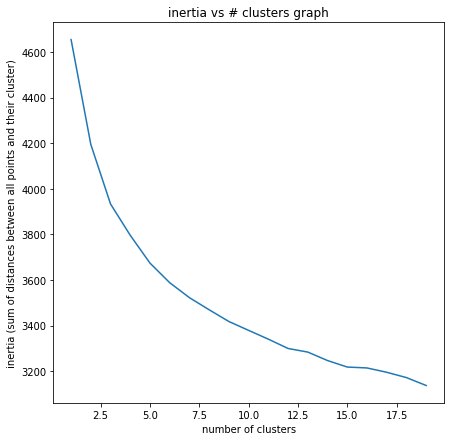

In [34]:
plt.figure(figsize=(7, 7))
plt.title('inertia vs # clusters graph')
plt.xlabel('number of clusters')
plt.ylabel('inertia (sum of distances between all points and their cluster)')
plt.plot(np.array(list(range(1, len(inertias) + 1))), np.array(inertias))

As we can see from the graph, the best `k` is about `7` or `8`

In [35]:
kmeans_model = KMeans(n_clusters=7)
kmeans_result = kmeans_model.fit_predict(data)

In [36]:
clusters = kmeans_model.cluster_centers_

In [ ]:
clusters[0]

array([ 2.14285714e-01, -1.44328993e-15,  1.02040816e-01, -1.04083409e-16,
        7.14285714e-02, -1.94289029e-16,  5.51020408e-01,  8.16326531e-02,
        1.22448980e-01,  9.18367347e-02,  1.02040816e-01, -2.08166817e-16,
        1.38777878e-16,  8.16326531e-02,  2.24489796e-01,  5.10204082e-02,
        1.02040816e-02, -2.08166817e-16,  6.12244898e-02, -2.77555756e-16,
        9.69387755e-01,  7.44897959e-01,  2.24489796e-01,  3.97959184e-01,
        3.87755102e-01,  4.08163265e-02,  9.18367347e-02,  8.16326531e-02,
        2.14285714e-01,  5.10204082e-02,  3.06122449e-02,  2.04081633e-02,
        1.80411242e-16,  2.77555756e-17,  1.73472348e-17,  3.46944695e-17,
        2.34693878e-01,  6.12244898e-02,  2.04081633e-02,  1.02040816e-02,
        5.10204082e-02,  2.04081633e-02,  4.08163265e-02,  1.53061224e-01,
       -1.04083409e-16, -5.55111512e-17, -4.85722573e-17, -2.08166817e-17,
        1.73472348e-17,  2.04081633e-02,  0.00000000e+00,  1.73472348e-17,
       -5.20417043e-17,  

Now let's see what each of the clusters represents. -- what features tend to cluster as a group?

In [45]:
np.argsort(clusters[0])[::-1][:5]

array([94,  1, 93, 89,  4])

In [47]:
# find the top 5 features in the cluster[i] that have the largest values 
for i in range(len(clusters)):
  indices = np.argsort(clusters[i])[::-1][:5]
  print(f"cluster {i}\' centroid represents")
  print("feature ", end = " ")
  for j in indices:
    name = data.columns[j]
    print(f"{name}", end = ", ")
  print()

cluster 0' centroid represents
feature  Bortezomib, Encounter for change or removal of surgical wound dressing code, Lenalidomide, ALK, Anemia, unspecified code, 
cluster 1' centroid represents
feature  Examination of participant in clinical trial code, Multiple myeloma, in remission code, Bortezomib, Dietary surveillance and counseling code, Neutropenia, unspecified code, 
cluster 2' centroid represents
feature  Bortezomib, Encounter for change or removal of surgical wound dressing code, Neutropenia, unspecified code, Other specified pre-operative examination code, TP, 
cluster 3' centroid represents
feature  Examination of participant in clinical trial code, Dietary surveillance and counseling code, Etoposide, Other specified aftercare following surgery code, TP, 
cluster 4' centroid represents
feature  Bortezomib, Encounter for change or removal of surgical wound dressing code, Disorders of magnesium metabolism code, Hypopotassemia code, Unspecified essential hypertension code, 
clu

# 2.K-Modes

Now, beware teh K-Means uses `Euclidean distance`, which assumes continuous features. But we have binary features. In this case K-Modes is more suitable. I think K-Modes uses `Hamming distance`, which is the number of different matches of features between two rows.

In [48]:
pip install kmodes

In [49]:
from kmodes.kmodes import KModes

In [51]:
# try to get the best # clusters by looking at cost.
cost = []
for i in range(2, 12):
  km = KModes(n_clusters=i, init='Huang', n_init=5, verbose=1)
  clusters = km.fit_predict(data)
  cost.append(km.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 124, cost: 5739.0
Run 1, iteration: 2/100, moves: 26, cost: 5739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 121, cost: 5765.0
Run 2, iteration: 2/100, moves: 24, cost: 5765.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 119, cost: 5777.0
Run 3, iteration: 2/100, moves: 30, cost: 5777.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 109, cost: 5818.0
Run 4, iteration: 2/100, moves: 53, cost: 5750.0
Run 4, iteration: 3/100, moves: 55, cost: 5739.0
Run 4, iteration: 4/100, moves: 1, cost: 5739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 117, cost: 5717.0
Run 5, iteration: 2/100, moves: 67, cost: 5717.0
Best run

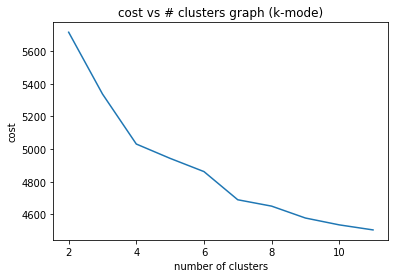

In [52]:
plt.title('cost vs # clusters graph (k-mode)')
plt.xlabel('number of clusters')
plt.ylabel('cost')
plt.plot(np.array(list(range(2, 12))), np.array(cost))

As we can see, K-Modes also suggest `7` is around the best number of clusters.

In [53]:
km = KModes(n_clusters= 7, init='Huang', n_init=5, verbose=1)

In [54]:
clusters = km.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 225, cost: 5027.0
Run 1, iteration: 2/100, moves: 180, cost: 4792.0
Run 1, iteration: 3/100, moves: 99, cost: 4717.0
Run 1, iteration: 4/100, moves: 15, cost: 4717.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 295, cost: 4915.0
Run 2, iteration: 2/100, moves: 79, cost: 4871.0
Run 2, iteration: 3/100, moves: 6, cost: 4871.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 176, cost: 4944.0
Run 3, iteration: 2/100, moves: 55, cost: 4873.0
Run 3, iteration: 3/100, moves: 34, cost: 4855.0
Run 3, iteration: 4/100, moves: 12, cost: 4849.0
Run 3, iteration: 5/100, moves: 7, cost: 4849.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 178, cost: 4716.0
Run 4, iteration: 2/100, moves: 64, cost

In [55]:
km.cluster_centroids_

array([[0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [56]:
km.cost_

4689.0

How to interpret this? We will add up the centroids to see how many times a feature appeas in all of the clusters.

In [57]:
centroids = km.cluster_centroids_

In [60]:
centroids_merge = centroids[0]
for i in range(1, len(centroids)):
  centroids_merge += centroids[i]

In [61]:
centroids_merge

array([3., 6., 1., 0., 4., 0., 0., 3., 1., 3., 2., 0., 1., 1., 2., 2., 0.,
       0., 0., 0., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 2., 2., 4., 5., 5., 6., 3., 1., 1., 0., 0.])

In [62]:
len(centroids_merge)

100

In [66]:
print('features that are important under K-Modes algorithm:')
print()
num_centroids = len(centroids)
for i, val in enumerate(centroids_merge):
  feature_name = data.columns[i]
  if val != 0:
    print(f'{feature_name} appears {val} number of times in {num_centroids} clusters created by K-Modes')

features that are important under K-Modes algorithm:

Unspecified essential hypertension code appears 3.0 number of times in 7 clusters created by K-Modes
Encounter for change or removal of surgical wound dressing code appears 6.0 number of times in 7 clusters created by K-Modes
Esophageal reflux code appears 1.0 number of times in 7 clusters created by K-Modes
Anemia, unspecified code appears 4.0 number of times in 7 clusters created by K-Modes
Neutropenia, unspecified code appears 3.0 number of times in 7 clusters created by K-Modes
Disorders of magnesium metabolism code appears 1.0 number of times in 7 clusters created by K-Modes
Other specified pre-operative examination code appears 3.0 number of times in 7 clusters created by K-Modes
Constipation, unspecified code appears 2.0 number of times in 7 clusters created by K-Modes
Laboratory examination, unspecified code appears 1.0 number of times in 7 clusters created by K-Modes
Backache, unspecified code appears 1.0 number of times in

By the way we can also explroe K-modes more, there is another initialization method called `Cao` that is different from `Huang`.

# 3.DBSCAN

- density-based clustering algorithm. separates data of high density region from low densisty region. (not probability density I think? Just how "dense" points are).
- good to detect outliers
- This algorithm is better than k-means when it comes to working with oddly shaped data.

## DBSCAN on our data.

In [67]:
from sklearn.cluster import DBSCAN

In [68]:
from scipy.spatial import distance

In [69]:
dbscan_model = DBSCAN(eps=0.21, min_samples=8, metric = 'hamming')
dbscan_result = dbscan_model.fit_predict(data)

In [70]:
dbscan_result

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [71]:
dbscan_model = DBSCAN(eps=0.21, min_samples=8)
dbscan_result = dbscan_model.fit_predict(data)

In [72]:
dbscan_result

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [77]:
dbscan_model = DBSCAN(eps=2, min_samples=8)
dbscan_result = dbscan_model.fit_predict(data)

In [78]:
dbscan_result

array([-1, -1, -1,  0,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,
        0,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
        0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0,
        0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
        0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,  0, -1,  0,  0, -1, -1, -1,
       -1, -1,  0, -1, -1

This is not interpretable at all. All data points are in one big cluster.

## DBSCAN on synthetic data.

In [79]:
from sklearn.datasets import make_classification

In [80]:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

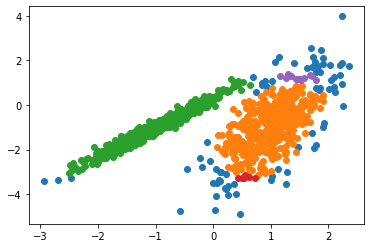

In [81]:
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

# train the model
dbscan_result = dbscan_model.fit_predict(training_data)

# get all of the unique clusters
dbscan_clusters = np.unique(dbscan_result)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    # get data points that fall in this cluster
    index = np.where(dbscan_result == dbscan_cluster)
    # make the plot
    plt.scatter(training_data[index, 0], training_data[index, 1])

# show the DBSCAN plot
plt.show()

In [82]:
dbscan_clusters

array([-1,  0,  1,  2,  3])

# 4. mean-shift clustering

- centroid based algorithm
- doesn't need a specification on number of clusters!

## on our data

In [84]:
from sklearn.cluster import MeanShift

In [85]:
mean_shift_model = MeanShift()

In [86]:
mean_shift_result = mean_shift_model.fit_predict(data)

In [87]:
mean_shift_result

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  7,  8,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  5,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1, 20,  0,  0, 17,  0, 17,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 18,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 14,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        9,  0,  0,  0,  0

In [88]:
mean_shift_clusters = mean_shift_model.cluster_centers_

In [89]:
len(mean_shift_clusters)

21

In [91]:
for centroid in mean_shift_clusters:
  print(centroid)

[0.3148855  0.66030534 0.12977099 0.03053435 0.42748092 0.09160305
 0.15076336 0.4351145  0.16412214 0.34541985 0.29770992 0.10496183
 0.08206107 0.19274809 0.25381679 0.30916031 0.02862595 0.08969466
 0.1278626  0.08396947 0.49045802 0.29389313 0.09923664 0.08969466
 0.07251908 0.01908397 0.05916031 0.04007634 0.15839695 0.11832061
 0.03816794 0.03816794 0.08206107 0.11068702 0.00381679 0.01717557
 0.05534351 0.10687023 0.02671756 0.1240458  0.02290076 0.00954198
 0.04580153 0.24236641 0.04580153 0.08778626 0.02099237 0.03816794
 0.00954198 0.02862595 0.01908397 0.00572519 0.01908397 0.00572519
 0.03244275 0.00763359 0.03435115 0.00763359 0.01335878 0.00381679
 0.00763359 0.0019084  0.0019084  0.00954198 0.00572519 0.00954198
 0.05152672 0.00572519 0.00763359 0.01145038 0.00572519 0.03435115
 0.00763359 0.         0.0019084  0.00381679 0.         0.0019084
 0.00381679 0.03053435 0.0019084  0.0019084  0.         0.00381679
 0.00381679 0.0019084  0.00572519 0.00572519 0.30916031 0.35305

Don't know why this looks so weird. The first centroid has decimals but other centroids only has `1` and `0`'s.. Let's just interpret the results on the first centroid - it contains the most examples anyways.

In [92]:
print('top features that are thought to be important by mean-shift clustering:')
print()
first_centroid = mean_shift_clusters[0]
indices_of_largest_values = np.argsort(first_centroid)[::-1][:5]
for index in indices_of_largest_values:
  feature_name_of_this_index = data.columns[index]
  print(f'{feature_name_of_this_index}', end = ', ') 

top features that are thought to be important by mean-shift clustering:

Bortezomib, Encounter for change or removal of surgical wound dressing code, TP, Lenalidomide, Examination of participant in clinical trial code, 

## on synthetic data

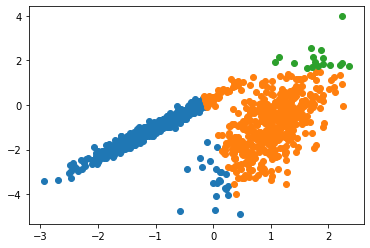

In [97]:
# define the model
mean_model = MeanShift()

# assign each data point to a cluster
mean_result = mean_model.fit_predict(training_data)

# get all of the unique clusters
mean_clusters = np.unique(mean_result)

# plot Mean-Shift the clusters
for mean_cluster in mean_clusters:
    # get data points that fall in this cluster
    index = np.where(mean_result == mean_cluster)
    # make the plot
    plt.scatter(training_data[index, 0], training_data[index, 1])

# show the Mean-Shift plot
plt.show()

# 5.EM clustering using Gaussian Mixture model

- distribution based clustering. Assumes each cluster is distributed as a Gaussian
- this overcomes the pitfall of K-Means that only fits well with **circular** clusters. Because in the definition of distance for K-means, it penalizes data that are far away (so a ellipsoid of data have large sum of distances than a circle of data) 
- highly doubt this will work well for our dataset because Gaussian distribution is continuous and our data is categorical/binary

In [98]:
from sklearn.mixture import GaussianMixture

## on synthetic data

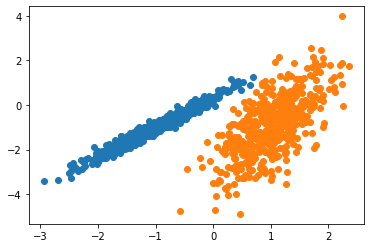

In [99]:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
gaussian_model = GaussianMixture(n_components=2)

# train the model
gaussian_model.fit(training_data)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(training_data)

# get all of the unique clusters
gaussian_clusters = np.unique(gaussian_result)

# plot Gaussian Mixture the clusters
for gaussian_cluster in gaussian_clusters:
    # get data points that fall in this cluster
    index = np.where(gaussian_result == gaussian_cluster)
    # make the plot
    plt.scatter(training_data[index, 0], training_data[index, 1])

# show the Gaussian Mixture plot
plt.show()

## on our data

In [100]:
gaussian_model = GaussianMixture(n_components=7)
gaussian_model.fit(data)
gaussian_result = gaussian_model.predict(data)

In [101]:
gaussian_result

array([0, 4, 5, 5, 5, 5, 0, 5, 5, 5, 6, 5, 5, 5, 4, 4, 0, 5, 5, 5, 1, 5,
       1, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 2, 2, 2, 5, 5, 5, 2, 5, 5,
       2, 2, 5, 5, 5, 1, 5, 1, 2, 5, 5, 2, 5, 2, 4, 5, 4, 2, 4, 2, 2, 5,
       5, 2, 4, 2, 4, 6, 4, 2, 2, 5, 1, 4, 4, 5, 5, 4, 4, 2, 2, 5, 2, 2,
       2, 2, 2, 4, 6, 2, 2, 2, 2, 2, 2, 4, 6, 4, 2, 2, 4, 2, 3, 4, 2, 2,
       4, 1, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 6, 2, 4, 4, 2, 2, 4, 6, 2,
       4, 2, 4, 0, 3, 6, 0, 4, 6, 4, 6, 6, 3, 3, 2, 3, 4, 3, 4, 4, 0, 5,
       3, 3, 4, 6, 3, 3, 4, 6, 6, 6, 3, 6, 6, 3, 0, 5, 4, 1, 6, 1, 3, 4,
       3, 3, 4, 4, 4, 3, 4, 6, 3, 6, 6, 4, 4, 3, 4, 4, 4, 5, 6, 2, 4, 3,
       3, 3, 3, 2, 5, 6, 3, 3, 1, 6, 6, 4, 6, 1, 3, 6, 4, 4, 1, 4, 4, 3,
       0, 6, 4, 1, 4, 6, 1, 1, 0, 4, 6, 6, 4, 0, 4, 0, 4, 3, 3, 4, 0, 4,
       3, 4, 6, 3, 3, 0, 0, 0, 6, 4, 6, 1, 6, 4, 6, 0, 5, 3, 4, 1, 1, 3,
       6, 4, 4, 0, 4, 6, 1, 4, 3, 0, 3, 4, 4, 0, 4, 3, 5, 1, 3, 4, 6, 0,
       1, 1, 6, 6, 4, 5, 0, 3, 4, 4, 1, 1, 1, 6, 4,

In [257]:
gaussian_model.means_

array([[0.25848744, 0.3603529 , 0.07886057, 0.00876229, 0.1938664 ,
        0.        , 0.28039315, 0.24096287, 0.07117026, 0.23659629,
        0.17086458, 0.        , 0.        , 0.11390972, 0.19384226,
        0.11060404, 0.02628686, 0.00876229, 0.092004  , 0.01314343,
        0.76231888, 0.50821259, 0.16210229, 0.20153258, 0.16648343,
        0.02628686, 0.06571715, 0.06571715, 0.17086479, 0.07447943,
        0.02628686, 0.01314343, 0.        , 0.00438114, 0.        ,
        0.        , 0.122672  , 0.10076651, 0.02190572, 0.07009829,
        0.02190572, 0.01752457, 0.030668  , 0.3296577 , 0.00438114,
        0.        , 0.        , 0.        , 0.        , 0.02190572,
        0.01314343, 0.        , 0.00876229, 0.00876229, 0.        ,
        0.        , 0.01424282, 0.00876229, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00876229, 0.        , 0.        , 0.        ,
        0.        , 0.00438114, 0.        , 0.  

In [102]:
gaussian_means = gaussian_model.means_

In [105]:
# find the top 5 features in each of the gaussian means.
for i in range(len(gaussian_means)):
  indices = np.argsort(gaussian_means[i])[::-1][:5]
  print(f"Gaussian of cluster {i} represents")
  print("feature ", end = " ")
  for j in indices:
    name = data.columns[j]
    print(f"{name}", end = ", ")
  print()

Gaussian of cluster 0 represents
feature  Bortezomib, Encounter for change or removal of surgical wound dressing code, Anemia, unspecified code, TP, Thrombocytopenia, unspecified code, 
Gaussian of cluster 1 represents
feature  Bortezomib, Encounter for change or removal of surgical wound dressing code, Lenalidomide, Anemia, unspecified code, TP, 
Gaussian of cluster 2 represents
feature  Examination of participant in clinical trial code, Multiple myeloma, in remission code, Bortezomib, Neutropenia, unspecified code, TP, 
Gaussian of cluster 3 represents
feature  Other specified pre-operative examination code, Neutropenia, unspecified code, TP, Bortezomib, Encounter for change or removal of surgical wound dressing code, 
Gaussian of cluster 4 represents
feature  Bortezomib, Encounter for change or removal of surgical wound dressing code, Lenalidomide, Other specified pre-operative examination code, ALK, 
Gaussian of cluster 5 represents
feature  Examination of participant in clinical t

# 6. Agglomerative Hierarchical Clustering

In [106]:
from sklearn.cluster import AgglomerativeClustering

## try on syntatic data.

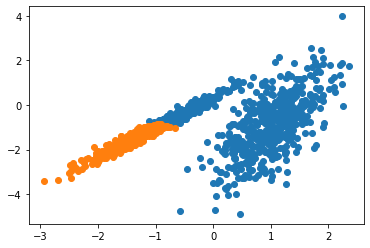

In [107]:
# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
agglomerative_model = AgglomerativeClustering(n_clusters=2)

# assign each data point to a cluster
agglomerative_result = agglomerative_model.fit_predict(training_data)

# get all of the unique clusters
agglomerative_clusters = np.unique(agglomerative_result)

# plot the clusters
for agglomerative_cluster in agglomerative_clusters:
    # get data points that fall in this cluster
    index = np.where(agglomerative_result == agglomerative_cluster)
    # make the plot
    plt.scatter(training_data[index, 0], training_data[index, 1])

# show the Agglomerative Hierarchy plot
plt.show()

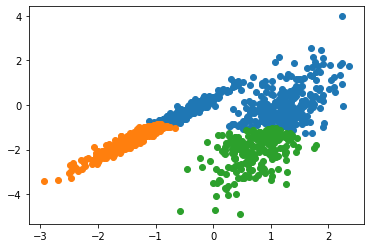

In [108]:
# define the model
agglomerative_model = AgglomerativeClustering(n_clusters=3)

# assign each data point to a cluster
agglomerative_result = agglomerative_model.fit_predict(training_data)

# get all of the unique clusters
agglomerative_clusters = np.unique(agglomerative_result)

# plot the clusters
for agglomerative_cluster in agglomerative_clusters:
    # get data points that fall in this cluster
    index = np.where(agglomerative_result == agglomerative_cluster)
    # make the plot
    plt.scatter(training_data[index, 0], training_data[index, 1])

# show the Agglomerative Hierarchy plot
plt.show()

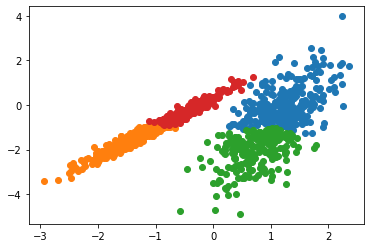

In [109]:
# define the model
agglomerative_model = AgglomerativeClustering(n_clusters=4)

# assign each data point to a cluster
agglomerative_result = agglomerative_model.fit_predict(training_data)

# get all of the unique clusters
agglomerative_clusters = np.unique(agglomerative_result)

# plot the clusters
for agglomerative_cluster in agglomerative_clusters:
    # get data points that fall in this cluster
    index = np.where(agglomerative_result == agglomerative_cluster)
    # make the plot
    plt.scatter(training_data[index, 0], training_data[index, 1])

# show the Agglomerative Hierarchy plot
plt.show()

## apply on our data

In [110]:
agglomerative_model = AgglomerativeClustering(n_clusters=5)
agglomerative_result = agglomerative_model.fit_predict(data)
agglomerative_clusters = np.unique(agglomerative_result)

In [111]:
agglomerative_clusters

array([0, 1, 2, 3, 4])

In [112]:
agglomerative_result

array([0, 0, 3, 3, 3, 3, 0, 3, 1, 3, 0, 3, 3, 1, 1, 2, 0, 3, 3, 3, 2, 1,
       2, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 4, 0, 2, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 3, 1, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 4, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 3, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 4, 0,
       4, 2, 0, 0, 2, 3, 0, 0, 2, 2, 2, 2, 2, 0, 2,

now we have the label on each data point (cluster it belongs to), but we want the meaning of these clusters. For Agglomerative Hierarchical Clustering I think the results can be given as a Hierarchical Graph. This is quite distinct from other approaches.

In [113]:
from scipy.cluster.hierarchy import dendrogram

In [114]:
# borrowed from sklearn page
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

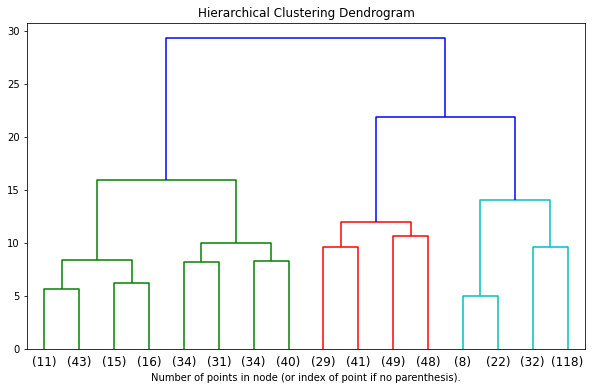

In [115]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)
plt.figure(figsize = (10, 6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

However, don't know if this means anything? How to interpret this Hierarchical clustering dendrogram?

# Conclusion

A couple of algorithms weren't very informative, such as `DBSCAN`, which clumps all data points as a single group. (don't know if I did anything wrong?) `Hierarchical Clustering` didn't show what features each cluster correspond to.

However we did get some results from the other algorithms. Particularly there are a couple of prominent features that clustering algorithm find. (keep in mind that a lot of features are 0 in each row. Data is sparse)

Prominent features include: `Bortezomib`, `Encounter for change or removal of surgical wound dressing code`, `TP`, `Examination of participant in clinical trial code`, `Lenalidomide`, `Anemia, unspecified code`